# Homework 3 - Logistic Regression

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's different than the previous HW in terms of data:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival

In this assignment, we will be using Logistic Regression to try and predict heart disease.

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW3.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [2]:
heart_disease_df = pd.read_csv("data_hw3.csv")
heart_disease_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

#### Answer 1:
There are 299 patients as indicated by calling heart_disease_df.info() below.

In [3]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


By now, you've had lots of experience with doing plots in Seaborn and Matplotlib. So for the visual analysis, you have a little bit more leash. Create __5__ or more unique plots that help you to explore and understand the data, whether that be analyzing a specific column or comparing different columns. More analysis usually results in extra points. If your answers or analysis are clearly an attempt at an easy answer or just stating what methods you used, you __will__ lose points. Remember, most of the points in the HW assignments come from your interpretation, not just copy and pasting code.

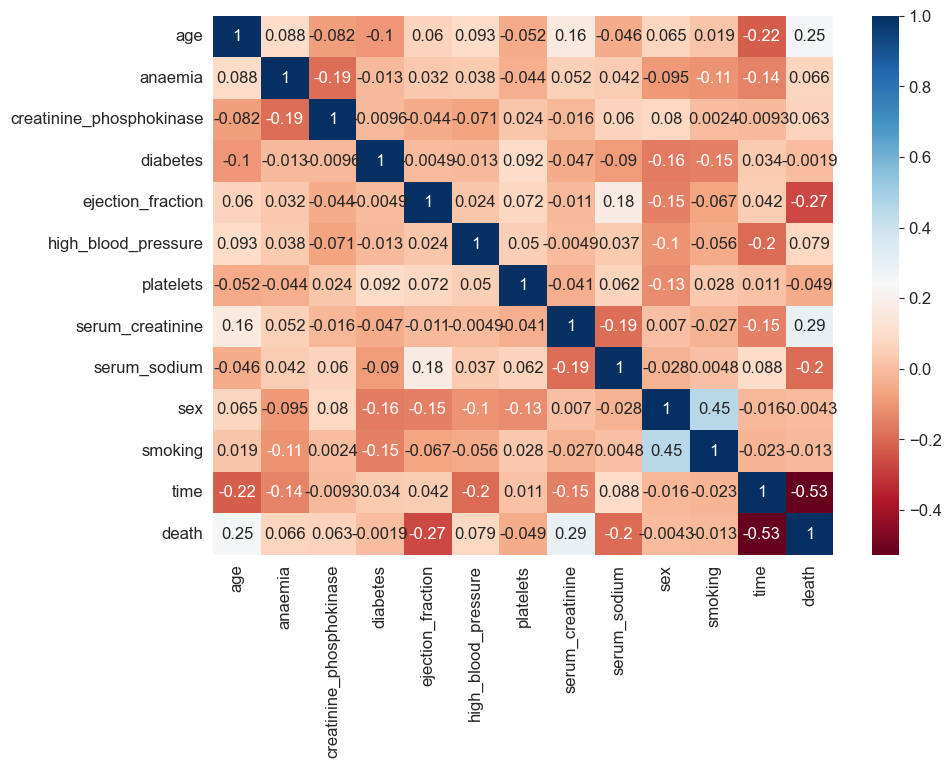

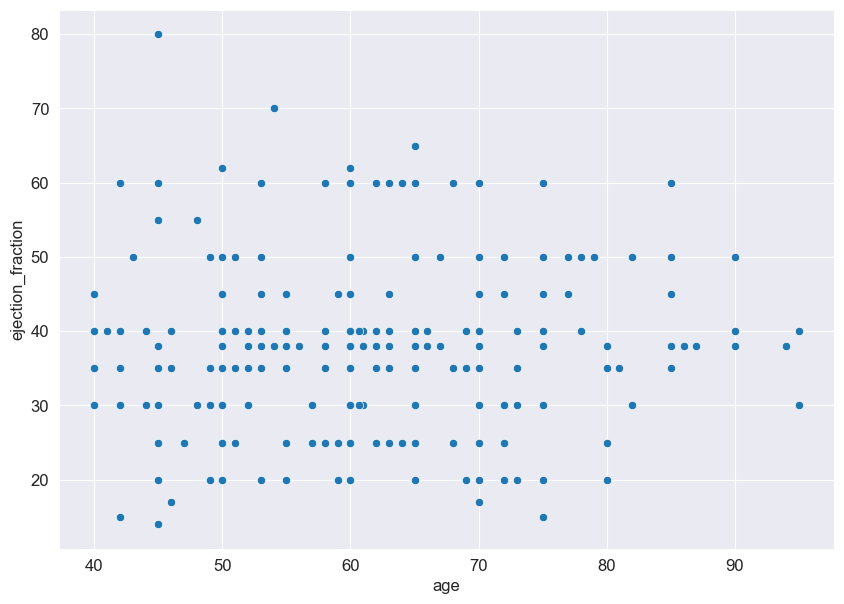

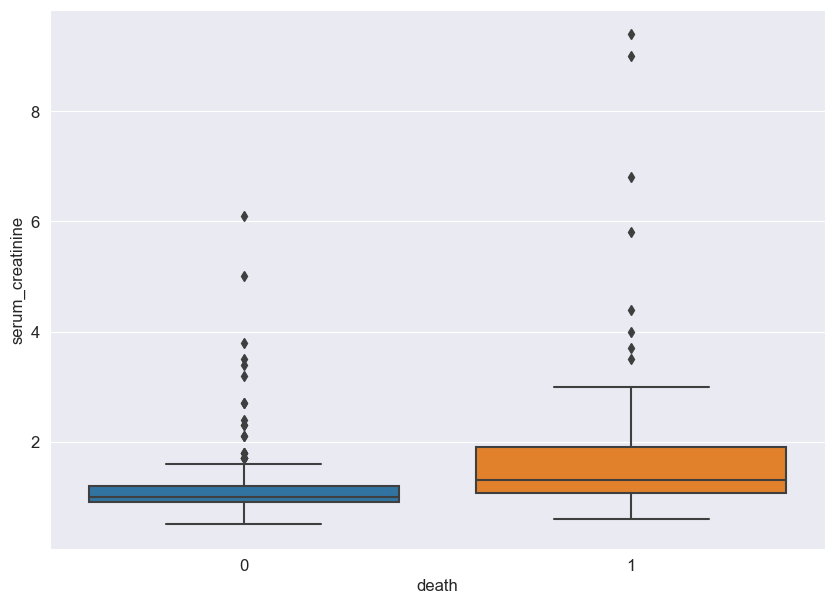

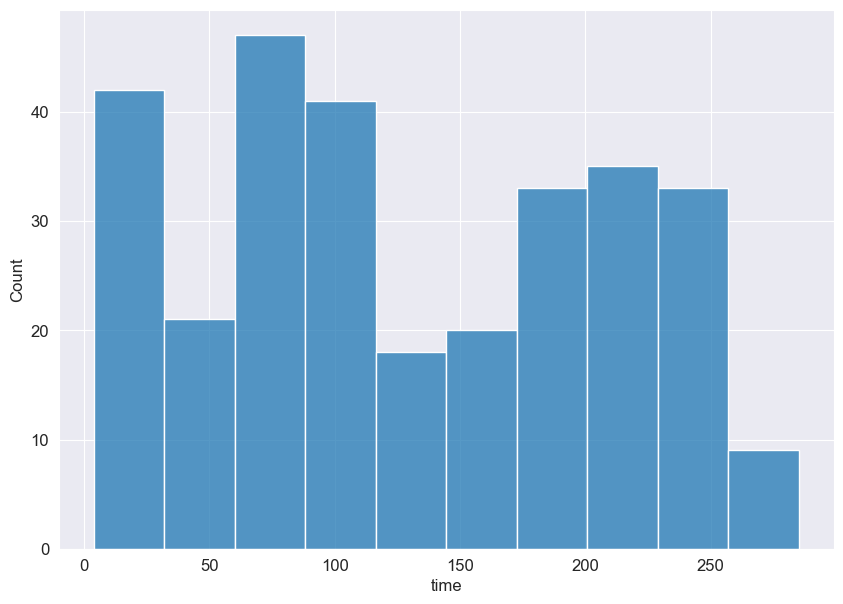

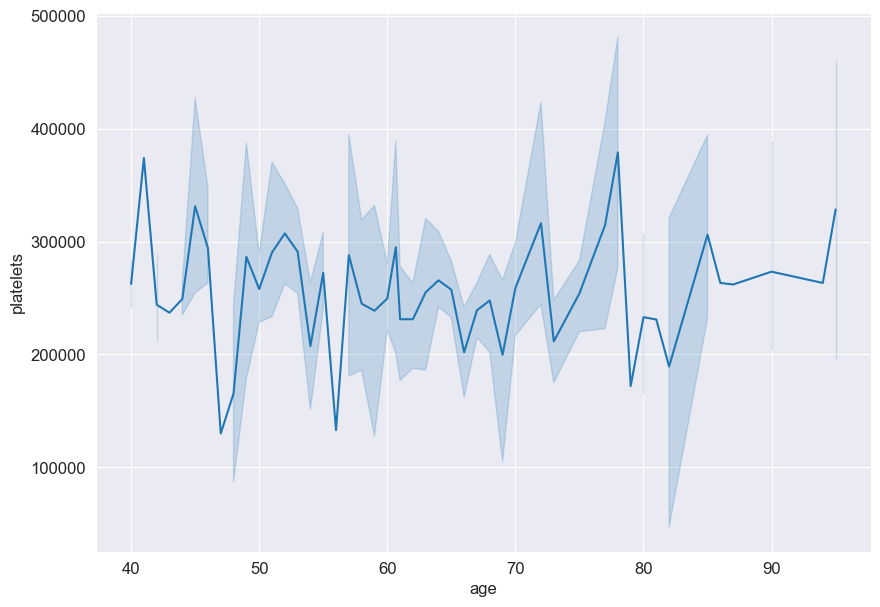

In [4]:
# Plot 1 (heatmap)
sns.heatmap(heart_disease_df.corr(), annot = True, cmap = "RdBu")
plt.show()

# Plot 2 (scatterplot)
sns.scatterplot(data = heart_disease_df, x = 'age', y = 'ejection_fraction')
plt.show()

# Plot 3 (boxplot)
sns.boxplot(data = heart_disease_df, x = 'death', y = 'serum_creatinine')
plt.show()

# Plot 4 (histplot)
sns.histplot(data = heart_disease_df, x = 'time')
plt.show()

# Plot 5 (lineplot)
sns.lineplot(data = heart_disease_df, x = 'age', y = 'platelets')
plt.show()

__Q2:__ Was there anything interesting you learned from your plots? If so, what?

#### Answer 2:
The heatmap shows that time has a moderate negative correlation with death, indicating that as the follow-up period increases, the probability that a patient dies during the period decreases. The scatterplot depicts the relationship between age and ejection fraction, however, there appears to be no correlation between them, also indicated by the heatmap. For the patients that died during the follow up period, the serum creatinine levels in their blood appeared to be more scattered between the maximum and minimum levels observed by the boxplot. Finally, there was no relationship between platelets in the blood and age.

__Q3:__ Is there anything the data did not tell you that you expected to see?

#### Answer 3:
Although the heatmap depicted a 0.25 low positive correlation between age and death during the follow up period, I expected to see at least a moderate positive correlation.

### Part 2: Logistic Regression

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

First, let's scale and then split the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [5]:
# Separate the features and target variable
X = heart_disease_df.drop('death', axis=1)
y = heart_disease_df['death']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

# Convert train_x and test_x back to pandas dataframes
train_x = pd.DataFrame(train_x, columns = X.columns)
test_x = pd.DataFrame(test_x, columns = X.columns)

print("train_x")
train_x.head()

train_x


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.327273,0.0,0.071319,1.0,0.166667,0.0,0.580555,0.056180,0.714286,1.0,0.0,0.715302
1,0.545455,0.0,0.017607,0.0,0.166667,0.0,0.265365,0.078652,0.828571,0.0,0.0,0.220641
2,0.036364,1.0,0.008038,0.0,0.318182,0.0,0.412050,0.067416,0.742857,1.0,1.0,0.701068
3,0.763636,1.0,0.106150,1.0,0.545455,1.0,0.358710,0.056180,0.914286,0.0,0.0,0.092527
4,0.854545,1.0,0.016076,0.0,0.363636,0.0,0.287186,0.044944,0.771429,1.0,0.0,0.035587


Create a Logistic Regression Model and output the accuracy on the training and testing set

In [6]:
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(train_x, train_y)

# Predict the target variable for the training and testing sets
train_pred = logreg.predict(train_x)
test_pred = logreg.predict(test_x)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(train_y, train_pred)
test_acc = accuracy_score(test_y, test_pred)

print("Training Accuracy")
train_acc

Training Accuracy


0.8660287081339713

In [7]:
print("Testing Accuracy")
test_acc

Testing Accuracy


0.7333333333333333

__Q4:__ What interval are the outputs of a logistic regression model contained in?

#### Answer 4:
The outputs of a logistic regression model are contained in the interval [0, 1].

__Q5:__ How does a Logistic Regression model classify data in a binary way?

#### Answer 5:
Logistic regression classifies data in a binary way by estimating the probability of the binary outcome variable being equal to 1 given the predictor variables. The estimated probability is modeled using a sigmoid function, and a threshold value is used to make a prediction. If the estimated probability is greater than the threshold, the model predicts that the outcome variable is 1, otherwise it predicts that it is 0.

Create a confusion matrix for the testing data.

Add ```plt.grid(b=None)``` after your code if you get gridlines

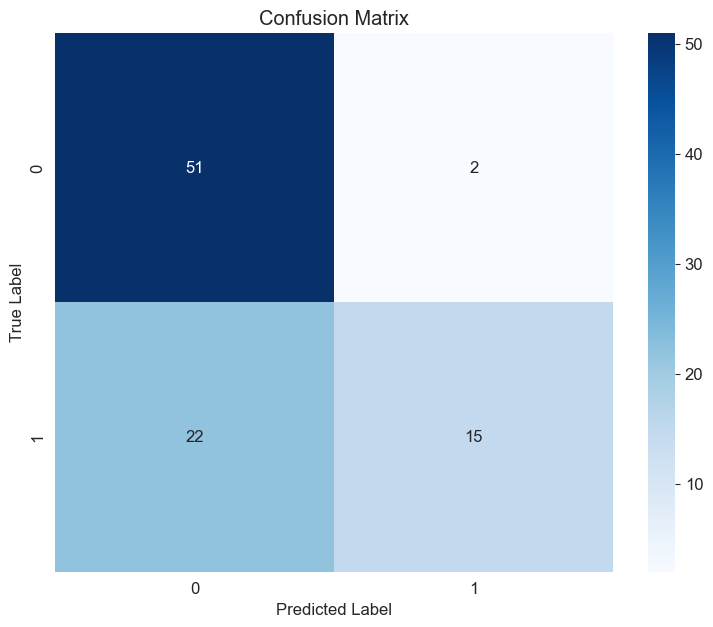

In [8]:
# Predict the target variable for the testing set
test_pred = logreg.predict(test_x)

# Create the confusion matrix
cm = confusion_matrix(test_y, test_pred)

# Plot the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Print the recall

In [9]:
# Calculate the recall
from sklearn.metrics import recall_score
recall = recall_score(test_y, test_pred)

print(recall)

0.40540540540540543


__Q6:__ What does the recall represent (Don't just tell me the formula)?

#### Answer 6:
Recall represents the proportion of actual positive cases that are correctly identified as positive by the model. In other words, it measures the ability of the model to identify all positive cases, also known as the true positive rate. A high recall value indicates that the model is able to correctly identify most positive cases, while a low recall value indicates that the model is missing many positive cases.

Print the precision

In [10]:
# Calculate the precision of the model on the testing set
from sklearn.metrics import precision_score
precision = precision_score(test_y, test_pred)

print(precision)

0.8823529411764706


__Q7:__ What does the precision represent (Don't just tell me the formula)?

#### Answer 7:
Precision represents the proportion of positive cases that are correctly identified by the model, out of all cases that the model has identified as positive. Essentially, it measures the accuracy of the positive predictions made by the model. A high precision value indicates that the model is making fewer false positive errors, while a low precision value indicates that the model is making many false positive errors.

__Q8:__ Which types of errors would be more costly for this problem, False Positives or False Negatives? Why?

#### Answer 8:
In predicting patient survival, false negatives are more costly than false positives. A false negative could delay or fail to provide necessary medical treatment and result in serious harm or loss of life. On the other hand, a false positive is generally less costly as the patient is likely to receive medical attention regardless of the prediction. Although false positives may result in unnecessary treatments, they are generally less severe than the consequences of missing a patient who actually survives.

Now, let's plot the predictions to try and get an idea of how our model performed. Plot the probability predictions of class label 1 (death), not the classification.

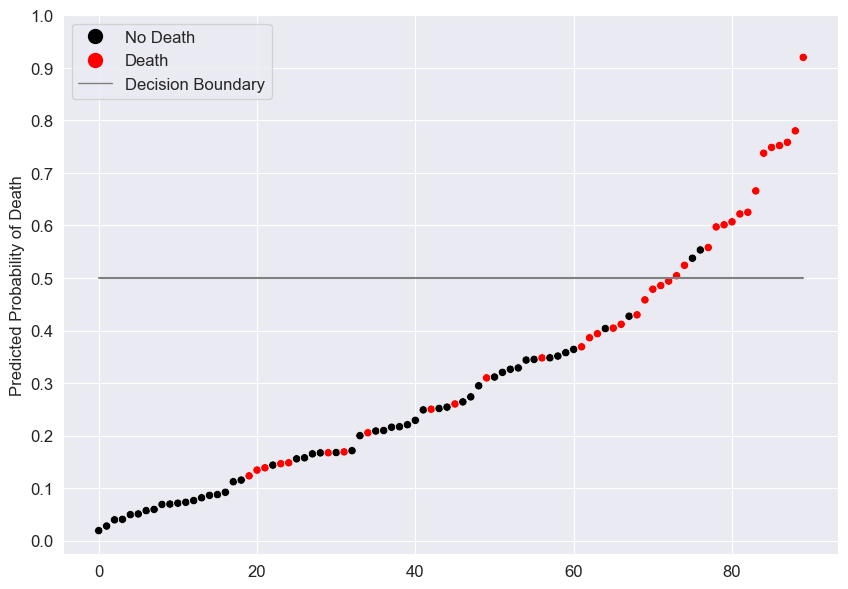

In [18]:
import matplotlib.lines as line

probability = logreg.predict_proba(test_x)[:, 1]
NumOfPatients = np.arange(0, len(test_x))

results = pd.DataFrame({"Patient_num": NumOfPatients, 'Predicted Probability of Death': probability, 'target':test_y})
results = results.sort_values(by = 'Predicted Probability of Death')
plot = sns.scatterplot(x = NumOfPatients, y = 'Predicted Probability of Death', hue = 'target', data = results, palette=['black', 'red'])
sns.lineplot(y = 0.5, x = NumOfPatients, color = 'gray', linestyle = '-')

boundary = line.Line2D([], [], color = 'gray', linestyle = '-', linewidth = 1, label = 'Decision Boundary')
death = line.Line2D([], [], color = 'red', marker = 'o', linestyle = 'None', markersize = 10, label = 'Death')
no_death = line.Line2D([], [], color = 'black', marker = 'o', linestyle = 'None', markersize = 10, label = 'No Death')

handles = [no_death, death, boundary]
labels = ['No Death', 'Death', 'Decision Boundary']

plot.legend(handles = handles, labels = labels)

plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

__Q9:__ Does this plot tell us anything interesting about our model? How well does it classify the data?

#### Answer 9:
This plot tells us that there are less deaths when we are below the decision boundary. However, once we go above the boundary, the chance of a patient dying during the follow up period significantly increases. The model's classification is acceptable, but there a still a handful of cases with a low probability of death that still result in death.

Create a data frame of the coefficients of the model

In [21]:
coefficients = logreg.coef_[0]
feature_names = train_x.columns.tolist()

c_df = pd.DataFrame({'Features': feature_names, 'Coefficients': coefficients})
c_df

,Features,Coefficients
0,age,1.595041
1,anaemia,-0.170426
2,creatinine_phosphokinase,0.179604
3,diabetes,-0.006560
4,ejection_fraction,-1.772368
5,high_blood_pressure,-0.108002
6,platelets,-0.298445
7,serum_creatinine,1.910766
8,serum_sodium,-0.822904
9,sex,-0.519334


__Q10:__ What do these coefficients mean? How are they calculated?

#### Answer 10:
The coefficients represent the magnitude and direction of the relationship between each independent variable (or feature) and the log odds of the dependent variable (or target). To calculate the coefficients, the logistic regression model fits a logistic function to the data using a maximum likelihood estimation (MLE) algorithm. During this process, the algorithm estimates the values of the coefficients that maximize the likelihood of the observed outcomes given the predictor variables.

__Q11__: Based on that, which features are important to the model?

#### Answer 11:
The features most important to the model are: time, serum_creatinine, ejection_fraction, age, and serum_sodium.

Do any other analysis you see fit, whether exploring the data more, assessing the model more intensely, etc.

In [22]:
from sklearn.preprocessing import RobustScaler

# Separate the features and target variable
X = heart_disease_df.drop('death', axis=1)
y = heart_disease_df['death']

# Scale the features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

# Convert train_x and test_x back to pandas dataframes
train_x = pd.DataFrame(train_x, columns = X.columns)
test_x = pd.DataFrame(test_x, columns = X.columns)

print("train_x")
train_x.head()

train_x


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.105263,0.0,0.713212,1.0,-0.866667,0.0,2.659341,-0.2,0.166667,0.0,0.0,0.692308
1,0.526316,0.0,-0.191192,0.0,-0.866667,0.0,-0.197802,0.2,0.833333,-1.0,0.0,-0.376923
2,-0.947368,1.0,-0.352309,0.0,-0.200000,0.0,1.131868,0.0,0.333333,0.0,1.0,0.661538
3,1.157895,1.0,1.299678,1.0,0.800000,1.0,0.648352,-0.2,1.333333,-1.0,0.0,-0.653846
4,1.421053,1.0,-0.216971,0.0,0.000000,0.0,0.000000,-0.4,0.500000,0.0,0.0,-0.776923


In [23]:
from sklearn.metrics import accuracy_score

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(train_x, train_y)

# Predict the target variable for the training and testing sets
train_pred = logreg.predict(train_x)
test_pred = logreg.predict(test_x)

# Calculate the accuracy of the model on the training and testing sets
train_acc = accuracy_score(train_y, train_pred)
test_acc = accuracy_score(test_y, test_pred)

print("Training Accuracy")
train_acc

Training Accuracy


0.8755980861244019

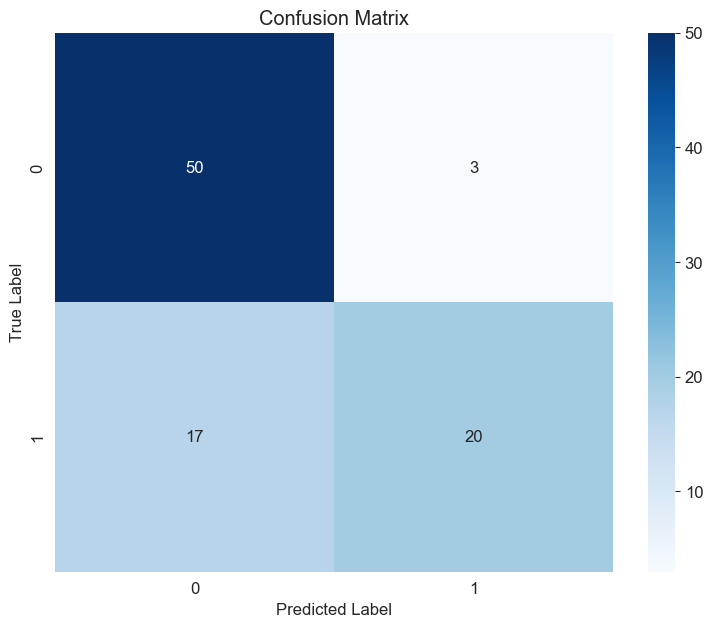

In [24]:
# Predict the target variable for the testing set
test_pred = logreg.predict(test_x)

# Create the confusion matrix
cm = confusion_matrix(test_y, test_pred)

# Plot the confusion matrix
plt.figure(figsize=(9,7))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Scaling the data with either RobustScaler or MinMaxScaler produces similar results.

Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

#### Report:
The goal was to predict whether a patient died during the follow-up period using logistic regression. We used several plots to identify relationships between features. For instance, the heatmap told us that time has a moderate negative correlation with death, indicating that as the follow-up period increases, the probability that a patient dies during the period decreases. The scatterplot portrayed the relationship between age and ejection fraction, however, there appeared to be no correlation between them, also indicated by the heatmap. For the patients that died during the follow up period, the serum creatinine levels in their blood appeared to be more scattered between the maximum and minimum levels observed by the boxplot. After transforming the data with MinMaxScaler and creating the logistic regression model, the highest coefficients of the model told us that the strongest predictors of death were: time, serum_creatinine, ejection_fraction, age, and serum_sodium. Thus, when determining the likelihood of a patient dying during the follow-up period, it is important to look out for those predictors.